<a href="https://colab.research.google.com/github/rahul-727/Computer-vision-lab-work/blob/main/2348544_CV_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
* Resizing
* Convertion to grayscale
* Noise reduction

In [5]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    smooth_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    return smooth_img


#  Feature Extraction

A)  Edges
* Canny edge detector
* The Canny Edge Detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images

In [6]:
def extract_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

B) Lines
* To detect lines, especially vertical, horizontal, and 45-degree lines, we can use the Hough Line Transform.
* The Hough Line Transform is a technique used to isolate features of a particular shape within an image. Specifically, it is designed to detect lines. The transform is based on the Hough transform method which was developed to recognize complex patterns of lines in an image

In [7]:
def extract_lines(image):
    lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=50, minLineLength=40, maxLineGap=5)
    line_img = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    return line_img


C) Points
* for detecting points we are using ORB
* ORB (Oriented FAST and Rotated BRIEF) is a feature extractor and descriptor that is fast and efficient, and often used in real-time applications.

In [8]:
def extract_keypoints(image):
    orb = cv2.ORB_create()
    keypoints, _ = orb.detectAndCompute(image, None)
    keypoint_img = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    return keypoint_img


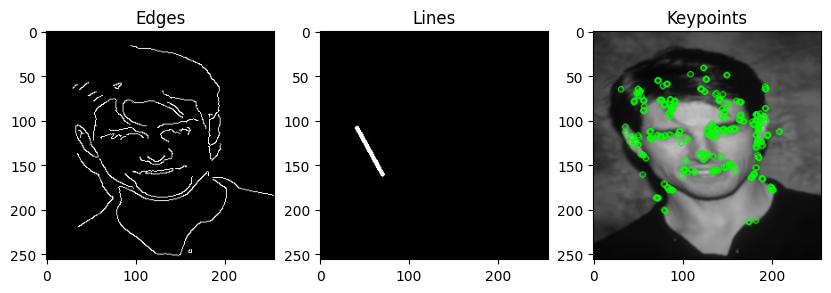

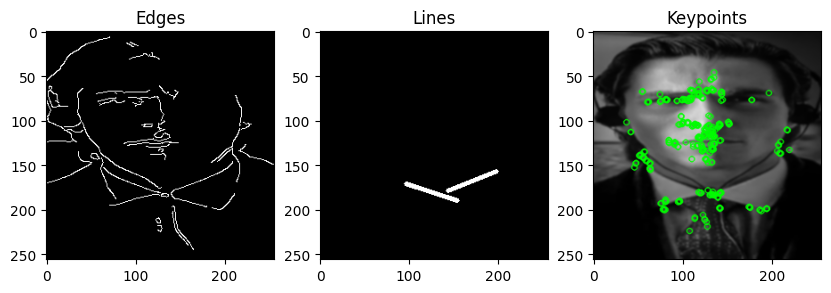

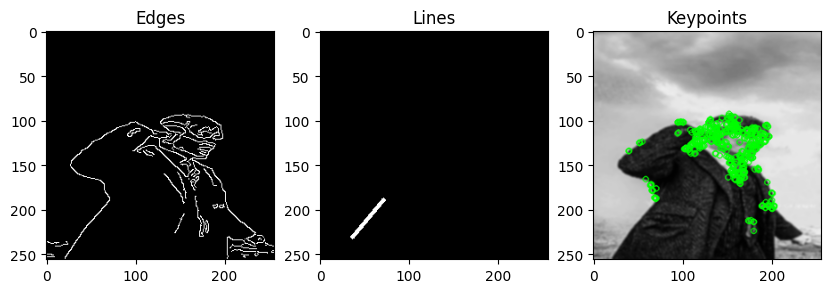

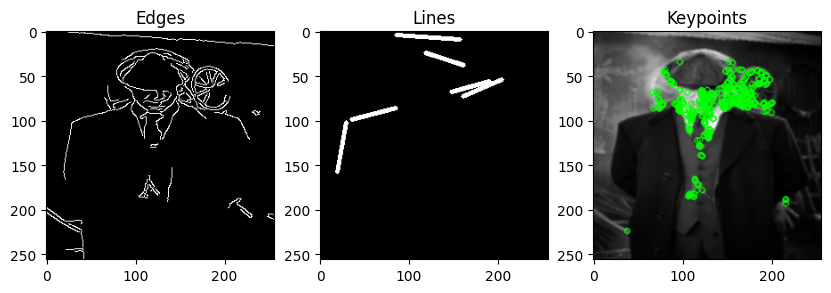

In [9]:
image_paths = ["/content/Films.jpeg", "/content/Inspiration.jpeg", "/content/Tomy.jpeg", "/content/download.jpeg"]
for path in image_paths:
    img = preprocess_image(path)
    edges = extract_edges(img)
    lines = extract_lines(edges)
    keypoints = extract_keypoints(img)

    plt.figure(figsize=(10, 8))
    plt.subplot(131), plt.imshow(edges, cmap='gray'), plt.title('Edges')
    plt.subplot(132), plt.imshow(lines, cmap='gray'), plt.title('Lines')
    plt.subplot(133), plt.imshow(keypoints), plt.title('Keypoints')
    plt.show()
